<a href="https://colab.research.google.com/github/marclamberts/football-analysis/blob/main/Scatterplot_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


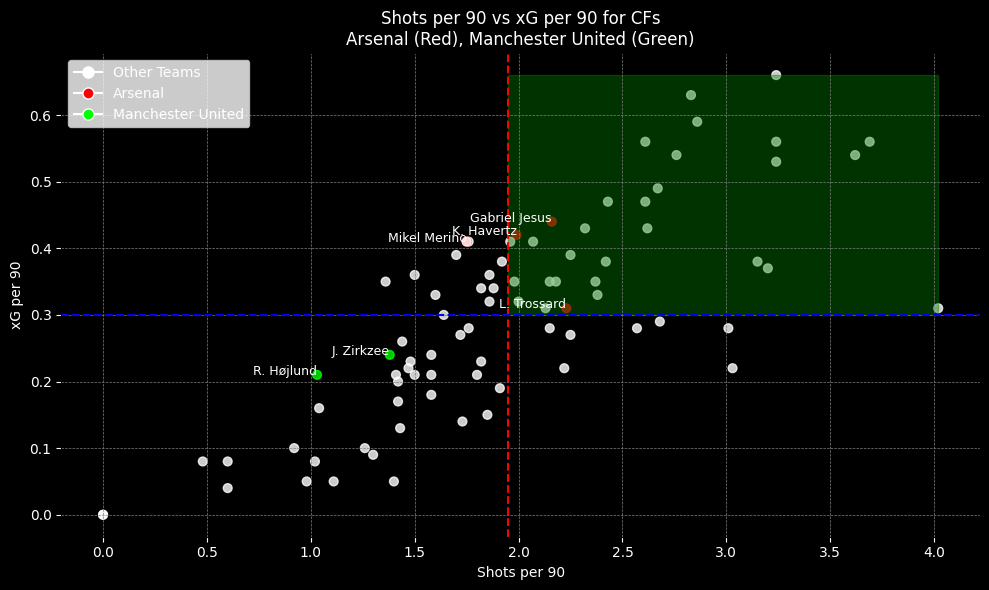

In [2]:
# STEP 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# STEP 2: Install openpyxl (for .xlsx support)
!pip install openpyxl

# STEP 3: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# STEP 4: Load Excel file from Google Drive
file_path = '/content/drive/MyDrive/Database March 2025/England II 2024-2025.xlsx'  # <-- update this path!
excel_file = pd.ExcelFile(file_path)
df = excel_file.parse('Search results (500)')

# STEP 5: Filter for Center Forwards
cf_players = df[df['Position'].str.contains("CF", na=False)]
cf_players_clean = cf_players.rename(columns=lambda x: x.strip())

# Identify stat columns
x_col = next((col for col in cf_players_clean.columns if 'shots per 90' in col.lower()), None)
y_col = next((col for col in cf_players_clean.columns if 'xg per 90' in col.lower()), None)

# Prepare data
plot_df = cf_players_clean[[x_col, y_col, 'Player', 'Team']].dropna()
x_mean = plot_df[x_col].mean()
y_mean = plot_df[y_col].mean()
top_xg = plot_df.sort_values(by=y_col, ascending=False).head(5)

# Assign colors
colors = []
for team in plot_df['Team']:
    if team == 'Arsenal':
        colors.append('red')
    elif team == 'Manchester United':
        colors.append('lime')
    else:
        colors.append('white')

# STEP 6: Create dark scatterplot
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

ax.scatter(plot_df[x_col], plot_df[y_col], c=colors, alpha=0.8, s=40, marker='o')

# Highlight quadrant
ax.fill_betweenx(
    y=[y_mean, plot_df[y_col].max()],
    x1=x_mean, x2=plot_df[x_col].max(),
    color='green', alpha=0.4, label='Top Right Quartile'
)

# Benchmark lines
ax.axvline(x=x_mean, color='red', linestyle='--', label=f'Avg {x_col}')
ax.axhline(y=y_mean, color='blue', linestyle='--', label=f'Avg {y_col}')

# Label Arsenal and Manchester United players only
for _, row in plot_df.iterrows():
    if row['Team'] in ['Arsenal', 'Manchester United']:
        ax.text(row[x_col], row[y_col], row['Player'], fontsize=9, ha='right', color='white')

# Labels & formatting
ax.set_xlabel(x_col, color='white')
ax.set_ylabel(y_col, color='white')
ax.set_title('Shots per 90 vs xG per 90 for CFs\nArsenal (Red), Manchester United (Green)', color='white')
ax.tick_params(colors='white')
ax.grid(True, color='gray', linestyle='--', linewidth=0.5)

# Custom legend
custom_lines = [
    Line2D([0], [0], marker='o', color='w', label='Other Teams', markersize=8, markerfacecolor='white'),
    Line2D([0], [0], marker='o', color='w', label='Arsenal', markersize=8, markerfacecolor='red'),
    Line2D([0], [0], marker='o', color='w', label='Manchester United', markersize=8, markerfacecolor='lime')
]
legend = ax.legend(handles=custom_lines, loc='upper left')
for text in legend.get_texts():
    text.set_color("white")

plt.tight_layout()
plt.show()
